Task-01 Beginner Level
Iris Flowers Classification ML Project
By - Gaurav Lute

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing the dataset

In [2]:
file_path= 'iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(file_path, names=column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Exploring the dataset using different function

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Finding Duplicates and removing it

In [10]:
# Checking Duplicates values in DF
df.duplicated().sum()

3

In [11]:
# removing Duplicates
df= df.drop_duplicates()

In [12]:
# Checking Duplicates 
df.duplicated().sum()

0

# Data Visualization for Species using box plot, joint plot and pairplot graphs

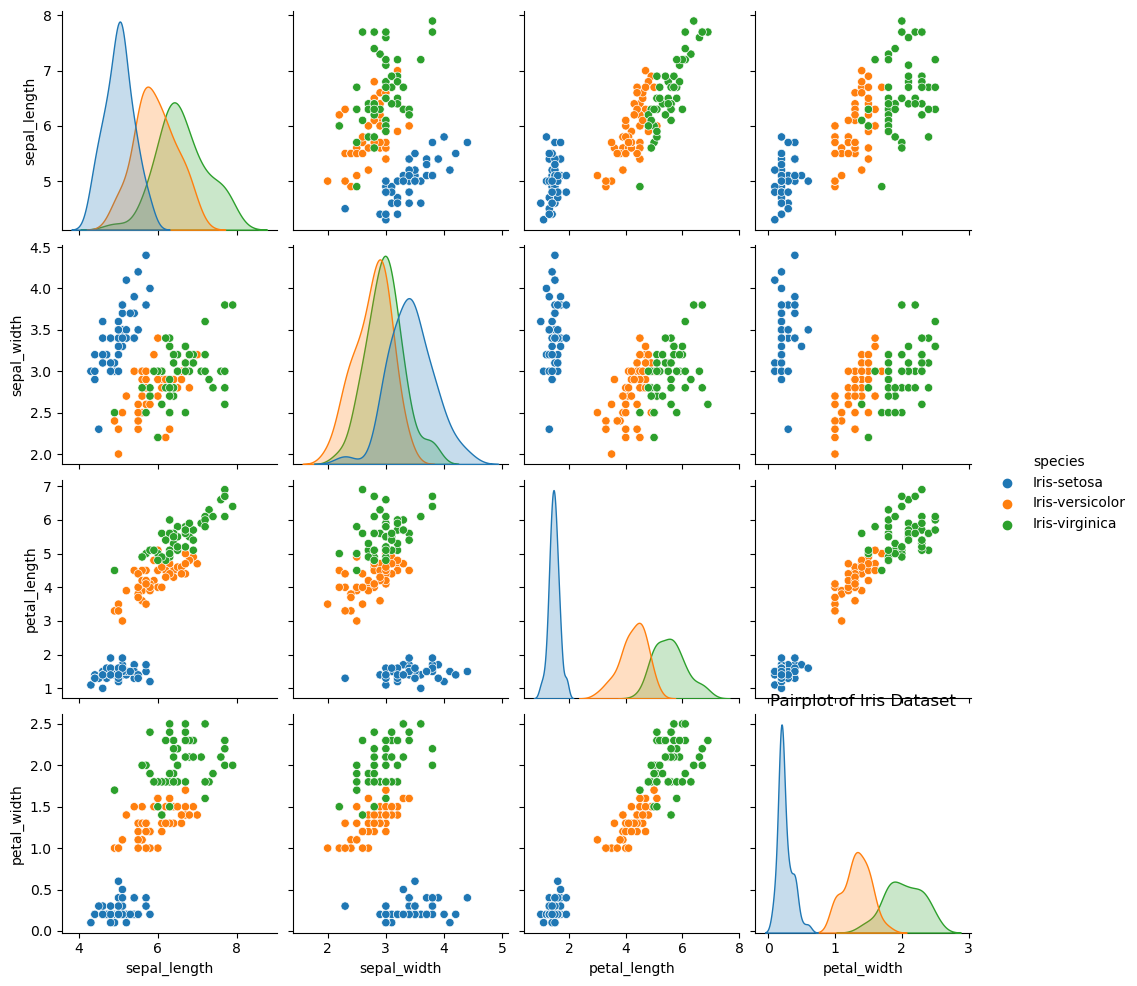

In [13]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.title('Pairplot of Iris Dataset')
plt.show()

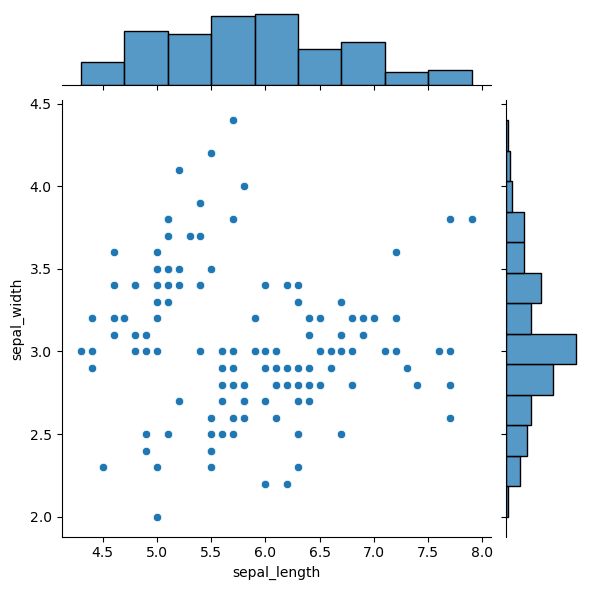

In [14]:
sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='scatter')
plt.show()

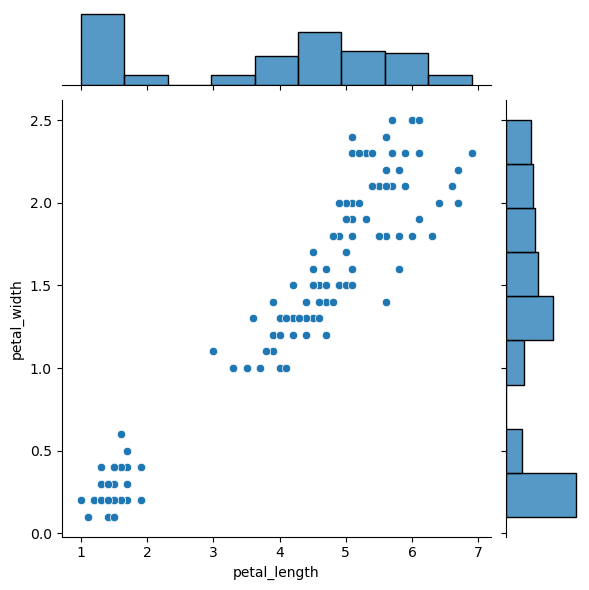

In [15]:
sns.jointplot(data=df, x='petal_length', y='petal_width', kind='scatter')
plt.show()

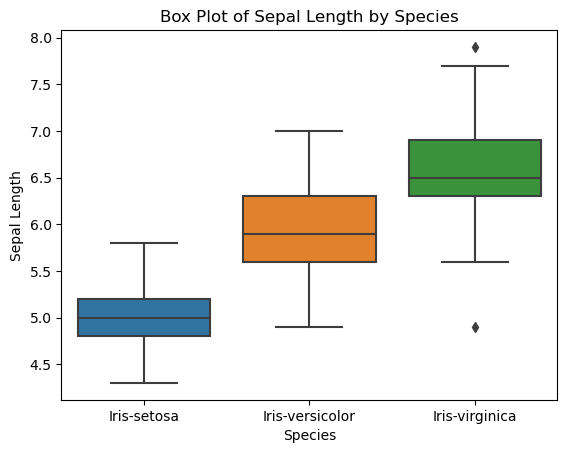

In [16]:
# Use Seaborn to create the box plot for 'sepal length' by species
sns.boxplot(x='species', y='sepal_length', data=df)

# Set plot title and labels
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

# Show the plot
plt.show()

This box plot allows us to compare the distribution of sepal lengths for different species of flowers. It provides insights into the central tendency, spread, and potential outliers within each species, aiding in the understanding of the variations in sepal lengths across the dataset.

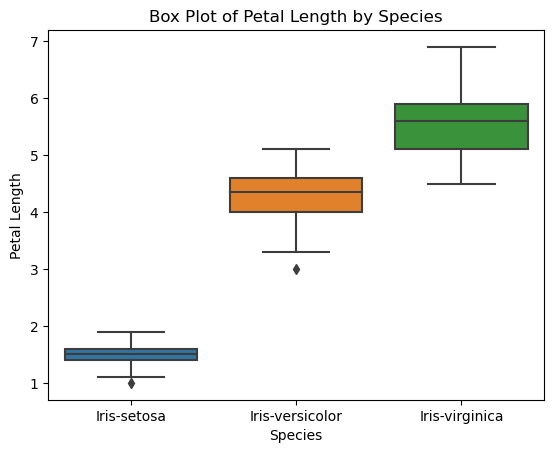

In [17]:
# Use Seaborn to create the box plot for 'Petal length' by species
sns.boxplot(x='species', y='petal_length', data=df)

# Set plot title and labels
plt.title('Box Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

# Show the plot
plt.show()

The box plot visually represents the distribution of 'petal length' measurements across different species of flowers. Each box in the plot corresponds to a specific species ('setosa', 'versicolor', and 'virginica'). The height of the box represents the interquartile range (IQR) of the 'petal length' values for each species. The line inside the box represents the median value of 'petal length' for that species.

From the box plot, we can make observations about the distribution of 'petal length' for each species. For instance, if the boxes are of different heights, it indicates variations in 'petal length' across species. If the medians within the boxes differ, it suggests differences in the central tendency of 'petal length' among species.

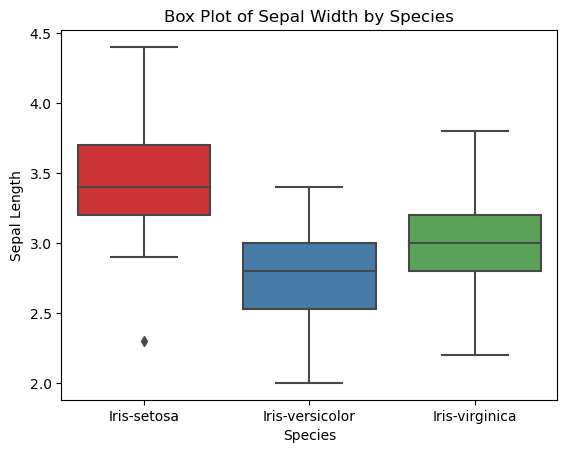

In [18]:
# Use Seaborn to create the box plot for 'sepal length' by species
sns.boxplot(x='species', y='sepal_width', data=df, palette='Set1')

# Set plot title and labels
plt.title('Box Plot of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

# Show the plot
plt.show()

The box plot allows us to compare the distribution of 'sepal width' for each species. We can observe the median value and the spread of data for each species.

From the plot, we can see that the 'sepal width' tends to be widest for the "setosa" species, followed by "versicolor," and then "virginica."

The boxes for "setosa" and "versicolor" species have similar interquartile ranges, indicating a similar spread of 'sepal width' values within these two species.

The box for "virginica" species is slightly shorter, indicating less variation in 'sepal width' compared to the other two species.

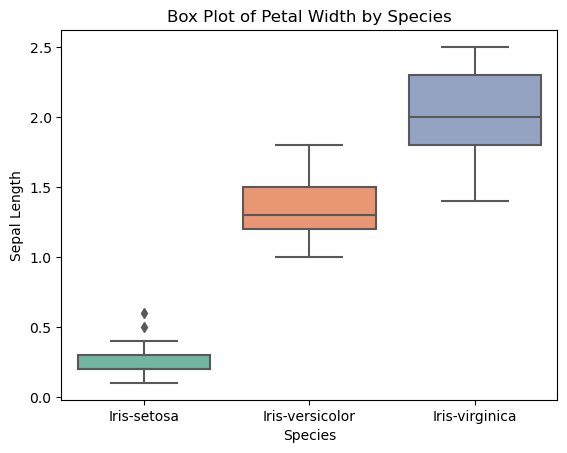

In [19]:
# Use Seaborn to create the box plot for 'sepal length' by species
sns.boxplot(x='species', y='petal_width', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

# Show the plot
plt.show()

The box plot allows us to compare the distribution of 'petal width' for each species. We can observe the median value and the spread of data for each species.

From the plot, we can see that the 'petal width' tends to be the widest for the "virginica" species, followed by "versicolor," and then "setosa."

The boxes for "versicolor" and "virginica" species have similar interquartile ranges, indicating a similar spread of 'petal width' values within these two species.

The box for "setosa" species is shorter, indicating less variation in 'petal width' compared to the other two species.

In [20]:
# Calculate correlation matrix
correlation_matrix = df.corr()

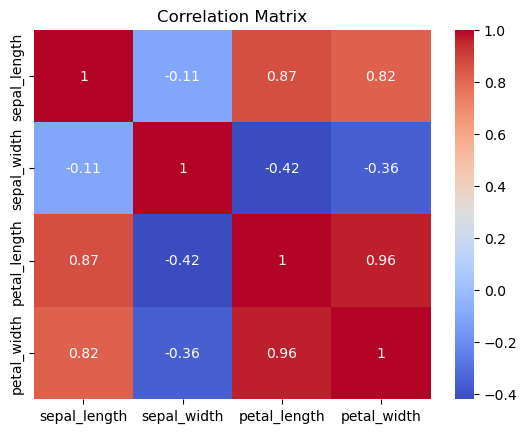

In [21]:
# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Applying label encoder

In [22]:
label=LabelEncoder()
Le=label.fit_transform(y)
Le

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Spliting the dataset into train and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Performing feature scaling

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Applying Random Forest Classifier

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [27]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

# Evaluate the model

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {} %".format(accuracy*100))

Accuracy Score: 98.0 %


This indicates that the model correctly predicted 98% of the iris flower species in the test data.